In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.txt', sep=',')

In [3]:
df.head()

,Marks_1,Marks_2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
X=df[['Marks_1','Marks_2']].values
y=df['Result'].values

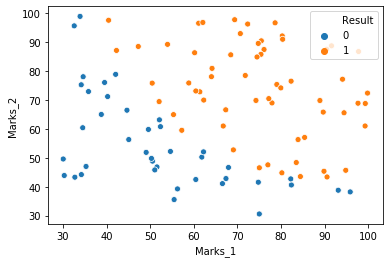

In [5]:
sns.scatterplot(df['Marks_1'],df['Marks_2'],hue=df['Result'])

In [12]:
def Logistic_Regression(X,y): #for Lasso(L1 Regularization)
    n,features=X.shape
    w=np.zeros(features) #As there are two features so the parameters are w1 and w2 which are initialized to zero.
    b=0 #Initialized the intercept to zero
    alpha=0.001 #learning rate
    iterations=100000
    lamda=100
    for i in range(iterations):
        lasso=(lamda/(2*n))*sum(w)
        eq=(np.dot(X,w.T)+b)+lasso
        y_pred=1/(1+np.exp(-eq))#sigmoid function [In binary classification problem if y_pred>0.5 then y=1 else 0]
        #Avg. cost func=(1/n)*Cost(y_pred,y)
        dev_w=(1/n)*np.dot((y_pred-y),X) #derivative of the avg. cost function w.r.t w
        dev_b=(1/n)*np.sum(y_pred-y)  #derivative of the avg. cost function w.r.t b
        
        alpha_w=dev_w * alpha #step_size
        alpha_b=dev_b * alpha
        
        w=w-alpha_w #new slope
        b=b-alpha_b #new intercept
    return w,b

In [13]:
Logistic_Regression(X, y)

(array([0.04507147, 0.03797333]), -4.825592793153289)

In [15]:
def predict(x):
    w,b=Logistic_Regression(X, y)
    eq = (np.dot(x,w.T) + b)
    y_pred = 1 /(1 + np.exp(-eq))
    if y_pred>0.5:
        return np.array([1])
    else:
        return np.array([0])

In [16]:
predict(np.array([[23.62366 , 30.024693]]))

array([0])

In [17]:
predict([[79.032736 , 175.344376]])

array([1])

In [18]:
def Logistic_Regression(X,y): #for Ridge(L2 Regularization)
    n,features=X.shape
    w=np.zeros(features) #As there are two features so the parameters are w1 and w2 which are initialized to zero.
    b=0 #Initialized the intercept to zero
    alpha=0.001 #learning rate
    iterations=100000
    lamda=100
    for i in range(iterations):
        lasso=(lamda/(2*n))*sum(w**2)
        eq=(np.dot(X,w.T)+b)+lasso
        y_pred=1/(1+np.exp(-eq))#sigmoid function [In binary classification problem if y_pred>0.5 then y=1 else 0]
        #Avg. cost func=(1/n)*Cost(y_pred,y)
        dev_w=(1/n)*np.dot((y_pred-y),X) #derivative of the avg. cost function w.r.t w
        dev_b=(1/n)*np.sum(y_pred-y)  #derivative of the avg. cost function w.r.t b
        
        alpha_w=dev_w * alpha #step_size
        alpha_b=dev_b * alpha
        
        w=w-alpha_w #new slope
        b=b-alpha_b #new intercept
    return w,b

In [19]:
Logistic_Regression(X, y)

(array([0.04527066, 0.03818108]), -4.812230733759229)

In [20]:
def predict(x):
    w,b=Logistic_Regression(X, y)
    eq = (np.dot(x,w.T) + b)
    y_pred = 1 /(1 + np.exp(-eq))
    if y_pred>0.5:
        return np.array([1])
    else:
        return np.array([0])

In [21]:
predict([[34.62366 , 78.024693]])

array([0])

In [22]:
predict([[90.032428 , 102.344245]])

array([1])